In [260]:
import pandas as pd
pd.set_option('max_rows',200)
pd.set_option('max_columns',100)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [261]:
deliv = pd.read_csv('deliveries.csv')


In [262]:
match = pd.read_csv('matches.csv')
match

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [70]:
match.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Rising Pune Supergiant','Kochi Tuskers Kerala','Pune Warriors']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','RPS','KTK','PW'],inplace=True)


encode = {'team1': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'team2': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'toss_winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,'Draw':14}}

In [263]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
id                 636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 89.5+ KB


In [71]:
s_man_of_match = match.groupby(match.player_of_match).player_of_match.count().sort_values(ascending=False).head(15)
df_man_of_match =s_man_of_match.to_frame()
df_man_of_match

,player_of_match
player_of_match,
CH Gayle,18
YK Pathan,16
DA Warner,15
AB de Villiers,15
SK Raina,14
RG Sharma,14
G Gambhir,13
MS Dhoni,13
AM Rahane,12


# Batting Stats

In [72]:
df_strike_rate = deliv.groupby(['batsman']).agg({'ball':'count','batsman_runs':'mean'}).sort_values(by='batsman_runs',ascending=False)

In [73]:
df_strike_rate.rename(columns ={'batsman_runs' : 'strike rate'}, inplace=True)

In [74]:
df_runs_per_match = deliv.groupby(['batsman','match_id']).agg({'batsman_runs':'sum'})

In [75]:
df_total_runs = df_runs_per_match.groupby(['batsman']).agg({'sum' ,'mean','count'})
df_total_runs.rename(columns ={'sum' : 'batsman run','count' : 'match count','mean' :'average score'}, inplace=True)

In [76]:
df_total_runs.columns = df_total_runs.columns.droplevel()

In [77]:
df_sixes = deliv[['batsman','batsman_runs']][deliv.batsman_runs==6].groupby(['batsman']).agg({'batsman_runs':'count'})

In [78]:
df_four = deliv[['batsman','batsman_runs']][deliv.batsman_runs==4].groupby(['batsman']).agg({'batsman_runs':'count'})

In [79]:
df_batsman_stat = pd.merge(pd.merge(pd.merge(df_strike_rate,df_total_runs, left_index=True, right_index=True),df_sixes, left_index=True, right_index=True),df_four, left_index=True, right_index=True)

In [80]:
df_batsman_stat.rename(columns = {'ball' : 'Ball', 'strike rate':'Strike Rate','batsman run' : 'Batsman Run','match count' : 'Match Count','average score' : 'Average score' ,'batsman_runs_x' :'Six','batsman_runs_y':'Four'},inplace=True)

In [81]:
df_batsman_stat['Strike Rate'] = df_batsman_stat['Strike Rate']*100
df_batsman_stat.sort_values(by='Batsman Run',ascending=False).head(25)

,Ball,Strike Rate,Match Count,Batsman Run,Average score,Six,Four
batsman,,,,,,,
V Kohli,3237,127.123880,131,4115,31.412214,149,361
SK Raina,3059,134.226872,143,4106,28.713287,161,360
RG Sharma,2996,129.305741,137,3874,28.277372,164,323
G Gambhir,3028,120.013210,130,3634,27.953846,51,422
CH Gayle,2360,146.228814,91,3451,37.923077,252,282
RV Uthappa,2721,124.586549,130,3390,26.076923,104,341
DA Warner,2440,138.237705,100,3373,33.730000,134,338
AB de Villiers,2231,146.571044,109,3270,30.000000,142,275
MS Dhoni,2419,135.179826,128,3270,25.546875,140,236


# Bowling Stats

In [82]:
condition = (deliv.dismissal_kind.notnull()) &(deliv.dismissal_kind != 'run out')&(deliv.dismissal_kind != 'retired hurt')

In [83]:
condition_fielding = (deliv.dismissal_kind == 'caught') | (deliv.dismissal_kind == 'run out')

In [84]:
df_bowlers = deliv.loc[condition,:].groupby(deliv.bowler).dismissal_kind.count().sort_values(ascending=False)

In [85]:
df_runs_match = deliv.groupby(['bowler','match_id']).agg({'total_runs':'sum','ball':'count',})

In [86]:
df_runs_match.total_runs = df_runs_match.total_runs

In [87]:
df_runs_match['run_Rate'] = df_runs_match.total_runs/df_runs_match.ball*6

In [88]:
df_runRate = df_runs_match.run_Rate.groupby(['bowler']).agg({'mean'})
df_bowlers = pd.merge(df_bowlers.to_frame(),df_runRate , how='inner', left_index=True, right_index=True)
df_bowlers.rename({'mean':'Run Rate'}, axis=1, inplace=True)
df_bowlers

,dismissal_kind,Run Rate
bowler,,
SL Malinga,143,6.581799
A Mishra,124,7.323351
DJ Bravo,122,7.998479
PP Chawla,120,8.123617
Harbhajan Singh,119,7.113658
R Vinay Kumar,101,8.235141
R Ashwin,100,6.789977
A Nehra,98,7.645083
DW Steyn,92,6.716300


# Fielding Stats

In [89]:
s_fielding = deliv.loc[condition_fielding,:].groupby(deliv.fielder).dismissal_kind.count().sort_values(ascending=False)
df_fielding= s_fielding.to_frame()
df_fielding.columns = ['fielding']
df_fielding.head(10)

,fielding
fielder,
KD Karthik,93
SK Raina,91
AB de Villiers,88
MS Dhoni,84
RV Uthappa,74
RG Sharma,69
V Kohli,68
NV Ojha,66
DJ Bravo,64


# Player performence throughout

In [115]:
df_points = df_batsman_stat[['Ball','Strike Rate','Average score','Batsman Run','Six']]

df_points['Six pts'] = df_points['Six']*2
df_points = pd.merge(df_points.merge(df_bowlers, left_index=True, right_index=True), df_fielding, left_index=True, right_index=True, how='left')
df_points.fillna(value=0, inplace=True)
df_points['dismissal_kind'] = df_points['dismissal_kind'] *20
df_points['fielding'] = df_points['fielding'] *10

df_points['Total Point'] = df_points['Batsman Run']+ df_points['Six']+df_points['dismissal_kind']+df_points['fielding']
df_points = df_points.drop('Six',1)
df_points.rename({'dismissal_kind':'bowling pts'}, axis=1, inplace=True)
df_points.rename({'fielding':'fielding pts'}, axis=1, inplace=True)
df_points.rename({'batsman run':'batsman run pts'}, axis=1, inplace=True)

df_points.sort_values(by='Total Point',ascending=False,inplace=True)
df_points.head(10)

C:\Users\akash\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Ball,Strike Rate,Average score,Batsman Run,Six pts,bowling pts,Run Rate,fielding pts,Total Point
SK Raina,3059,134.226872,28.713287,4106,322,480,7.500682,910.0,5657.0
RG Sharma,2996,129.305741,28.277372,3874,328,300,8.341580,690.0,5028.0
V Kohli,3237,127.123880,31.412214,4115,298,80,8.623894,680.0,5024.0
SR Watson,1869,136.811129,28.098901,2557,242,1620,7.597557,310.0,4608.0
DJ Bravo,1032,122.286822,15.580247,1262,96,2440,7.998479,640.0,4390.0
CH Gayle,2360,146.228814,37.923077,3451,504,360,8.442330,220.0,4283.0
YK Pathan,1953,142.293907,22.778689,2779,286,800,7.635454,440.0,4162.0
JH Kallis,2291,105.936272,25.547368,2427,88,1300,7.945536,330.0,4101.0
KA Pollard,1380,141.956522,20.406250,1959,250,1120,8.903651,570.0,3774.0
S Dhawan,2622,117.543860,27.517857,3082,124,80,8.467949,470.0,3694.0


In [116]:
merged_list = match[['id','team1']].merge(deliv, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
batting=merged_list.groupby(['team1'])['total_runs'].sum().reset_index().reset_index(drop=True)

In [117]:
teams = match.team1.append(match.team2)
teams_df = pd.DataFrame(teams)
teams_df.columns = ['team']
count_match_series = teams_df.groupby(teams_df.team).team.count()
count_match_df = pd.DataFrame(count_match_series)
count_match_df.columns = ['countplayed']
count_match_df.reset_index(inplace=True)
count_match_df.sort_values('team')
team_sorted = count_match_df.team
played_sorted = count_match_df.countplayed

In [164]:
merged_list = match[['id','team1']].merge(deliv, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)

In [165]:
bowling = merged_list.groupby(['team1'])['player_dismissed'].count().reset_index().reset_index(drop=True)

In [166]:
merged_list = match[['id','team1']].merge(deliv, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)

In [167]:
feilding = merged_list.groupby(['team1'])['fielder'].count().reset_index().reset_index(drop=True)

In [168]:
total = batting.merge(bowling,on='team1').merge(feilding,on='team1')


In [169]:
total.head()

,team1,total_runs,player_dismissed,fielder
0,CSK,23956.0,868,620
1,DC,12748.0,526,388
2,DD,17162.0,659,494
3,GL,2460.0,85,51
4,KKR,17981.0,745,534


In [170]:
total['D11_runs'] = total['total_runs'].apply(lambda x: x*1)

In [171]:
total['D11_Wickets'] = total['player_dismissed'].apply(lambda x: x*10)

In [172]:
total['D11_Catches'] = total['fielder'].apply(lambda x: x*5)

In [173]:
total.head()

,team1,total_runs,player_dismissed,fielder,D11_runs,D11_Wickets,D11_Catches
0,CSK,23956.0,868,620,23956.0,8680,3100
1,DC,12748.0,526,388,12748.0,5260,1940
2,DD,17162.0,659,494,17162.0,6590,2470
3,GL,2460.0,85,51,2460.0,850,255
4,KKR,17981.0,745,534,17981.0,7450,2670


In [174]:
total1 = total.drop(['total_runs', 'player_dismissed', 'fielder'], axis=1)

In [175]:
total1.head()

,team1,D11_runs,D11_Wickets,D11_Catches
0,CSK,23956.0,8680,3100
1,DC,12748.0,5260,1940
2,DD,17162.0,6590,2470
3,GL,2460.0,850,255
4,KKR,17981.0,7450,2670


In [176]:
total2 = total1.rename(columns={'team1':'team2'})

In [177]:
total2.head()

,team2,D11_runs,D11_Wickets,D11_Catches
0,CSK,23956.0,8680,3100
1,DC,12748.0,5260,1940
2,DD,17162.0,6590,2470
3,GL,2460.0,850,255
4,KKR,17981.0,7450,2670


In [178]:
final1 = pd.merge(match1,total2,on= 'team2')

In [179]:
final1.head()

,id,team1,team2,winner,D11_runs,D11_Wickets,D11_Catches
0,1,SRH,RCB,SRH,18275.0,6500,2410
1,17,RPS,RCB,RPS,18275.0,6500,2410
2,27,KKR,RCB,KKR,18275.0,6500,2410
3,33,RPS,RCB,RPS,18275.0,6500,2410
4,42,KXIP,RCB,KXIP,18275.0,6500,2410


In [180]:
final1.rename(columns={'D11_runs':'D11_runs_team2','D11_Wickets':'D11_Wickets_team2','D11_Catches':'D11_Catches_team2'},inplace=True)

In [181]:
final1.head()

,id,team1,team2,winner,D11_runs_team2,D11_Wickets_team2,D11_Catches_team2
0,1,SRH,RCB,SRH,18275.0,6500,2410
1,17,RPS,RCB,RPS,18275.0,6500,2410
2,27,KKR,RCB,KKR,18275.0,6500,2410
3,33,RPS,RCB,RPS,18275.0,6500,2410
4,42,KXIP,RCB,KXIP,18275.0,6500,2410


In [182]:
match1 = match.drop(['season', 'city', 'date','toss_winner','toss_decision','result','dl_applied','win_by_runs','win_by_wickets','player_of_match','venue','umpire1','umpire2','umpire3'], axis=1)

In [183]:
final = pd.merge(match1, total1, on='team1')

In [184]:
final.head()

,id,team1,team2,winner,D11_runs,D11_Wickets,D11_Catches
0,1,SRH,RCB,SRH,11201.0,4550,1710
1,10,SRH,MI,MI,11201.0,4550,1710
2,19,SRH,KXIP,SRH,11201.0,4550,1710
3,21,SRH,DD,SRH,11201.0,4550,1710
4,25,SRH,RPS,RPS,11201.0,4550,1710


In [185]:
final.rename(columns={'D11_runs':'D11_runs_team1','D11_Wickets':'D11_Wickets_team1','D11_Catches':'D11_Catches_team1'},inplace=True)

In [186]:
final.head()

,id,team1,team2,winner,D11_runs_team1,D11_Wickets_team1,D11_Catches_team1
0,1,SRH,RCB,SRH,11201.0,4550,1710
1,10,SRH,MI,MI,11201.0,4550,1710
2,19,SRH,KXIP,SRH,11201.0,4550,1710
3,21,SRH,DD,SRH,11201.0,4550,1710
4,25,SRH,RPS,RPS,11201.0,4550,1710


In [187]:
final_list = pd.merge(final,final1,on= 'id')

In [188]:
final_list1 = final_list.drop(['team1_y', 'team2_y', 'winner_y'], axis=1)

In [189]:
final_list2 = final_list1.rename(columns={'team1_x':'team1','team2_x':'team2','winner_x':'winner'})

In [190]:
final_list2.head()

,id,team1,team2,winner,D11_runs_team1,D11_Wickets_team1,D11_Catches_team1,D11_runs_team2,D11_Wickets_team2,D11_Catches_team2
0,1,SRH,RCB,SRH,11201.0,4550,1710,18275.0,6500,2410
1,10,SRH,MI,MI,11201.0,4550,1710,23798.0,8760,3125
2,19,SRH,KXIP,SRH,11201.0,4550,1710,20450.0,8190,2950
3,21,SRH,DD,SRH,11201.0,4550,1710,17162.0,6590,2470
4,25,SRH,RPS,RPS,11201.0,4550,1710,2635.0,950,365


In [191]:
final_list2.sort_values(by='id', ascending=True).head()

,id,team1,team2,winner,D11_runs_team1,D11_Wickets_team1,D11_Catches_team1,D11_runs_team2,D11_Wickets_team2,D11_Catches_team2
0,1,SRH,RCB,SRH,11201.0,4550,1710,18275.0,6500,2410
46,2,MI,RPS,RPS,23798.0,8760,3125,2635.0,950,365
128,3,GL,KKR,KKR,2460.0,850,255,17981.0,7450,2670
142,4,RPS,KXIP,KXIP,2635.0,950,365,20450.0,8190,2950
157,5,RCB,DD,RCB,18275.0,6500,2410,17162.0,6590,2470


In [192]:
final_list.dtypes

id                     int64
team1_x               object
team2_x               object
winner_x              object
D11_runs_team1       float64
D11_Wickets_team1      int64
D11_Catches_team1      int64
team1_y               object
team2_y               object
winner_y              object
D11_runs_team2       float64
D11_Wickets_team2      int64
D11_Catches_team2      int64
dtype: object

In [193]:
final_list2.replace(encode, inplace=True)

In [194]:
final_list2['Diff_Bat'] = final_list2['D11_runs_team1'] - final_list2['D11_runs_team2'].astype(float)
final_list2['Diff_Ball'] = final_list2['D11_Wickets_team1'] - final_list2['D11_Wickets_team2'].astype(float)
final_list2['Diff_Catch'] = final_list2['D11_Catches_team1'] - final_list2['D11_Catches_team2'].astype(float)

In [195]:
final_list3 = final_list2.drop(['D11_runs_team1', 'D11_runs_team2', 'D11_Wickets_team1','D11_Wickets_team2','D11_Catches_team1','D11_Catches_team2'], axis=1)

In [196]:
final_list3.head()

,id,team1,team2,winner,Diff_Bat,Diff_Ball,Diff_Catch
0,1,10,3,10.0,-7074.0,-1950.0,-700.0
1,10,10,1,1.0,-12597.0,-4210.0,-1415.0
2,19,10,9,10.0,-9249.0,-3640.0,-1240.0
3,21,10,7,10.0,-5961.0,-2040.0,-760.0
4,25,10,11,11.0,8566.0,3600.0,1345.0


In [197]:
final_list3['winner'] = pd.to_numeric(final_list3['winner'], errors='coerce')

In [198]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Diff_Bat','Diff_Ball','Diff_Catch']
le = LabelEncoder()
for i in var_mod:
    final_list3[i] = le.fit_transform(final_list3[i])
final_list3.dtypes 

id              int64
team1           int64
team2           int64
winner        float64
Diff_Bat        int64
Diff_Ball       int64
Diff_Catch      int64
dtype: object

In [199]:
final_list4 = final_list3.dropna(how='any',inplace = True)

In [200]:
print (final_list3[ pd.to_numeric(final_list3['winner'], errors='coerce').isnull()])


Empty DataFrame
Columns: [id, team1, team2, winner, Diff_Bat, Diff_Ball, Diff_Catch]
Index: []


In [201]:
final = final_list3.sort_values('id')

In [202]:
final.head()

,id,team1,team2,winner,Diff_Bat,Diff_Ball,Diff_Catch
0,1,10,3,10.0,29,38,34
46,2,1,11,11.0,114,115,106
128,3,8,2,2.0,10,4,4
142,4,11,9,9.0,5,3,3
157,5,3,7,3.0,64,57,53


In [264]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 633 entries, 0 to 45
Data columns (total 8 columns):
id            633 non-null int64
team1         633 non-null int64
team2         633 non-null int64
winner        633 non-null float64
Diff_Bat      633 non-null int64
Diff_Ball     633 non-null int64
Diff_Catch    633 non-null int64
label         633 non-null int32
dtypes: float64(1), int32(1), int64(6)
memory usage: 42.0 KB


In [204]:
final['label'] = final['winner'].eq(final['team2']).astype(int) 

In [265]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 633 entries, 0 to 45
Data columns (total 8 columns):
id            633 non-null int64
team1         633 non-null int64
team2         633 non-null int64
winner        633 non-null float64
Diff_Bat      633 non-null int64
Diff_Ball     633 non-null int64
Diff_Catch    633 non-null int64
label         633 non-null int32
dtypes: float64(1), int32(1), int64(6)
memory usage: 42.0 KB


In [205]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel


In [206]:
feature_names = list(final.columns[4:7])

In [207]:
feature_names

['Diff_Bat', 'Diff_Ball', 'Diff_Catch']

In [208]:
X=final[['Diff_Bat', 'Diff_Ball', 'Diff_Catch']]  # Features
y=final['label']

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [210]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\akash\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [211]:
clf=RandomForestClassifier(n_estimators=100)


In [212]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [213]:
y_pred=clf.predict(X_test)

In [214]:
from sklearn import metrics

In [215]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5473684210526316


In [216]:
from sklearn.ensemble import RandomForestClassifier


In [217]:
clf=RandomForestClassifier(n_estimators=100)



In [218]:
clf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [219]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index= feature_names).sort_values(ascending=False)
feature_imp

Diff_Bat      0.341608
Diff_Ball     0.333454
Diff_Catch    0.324939
dtype: float64

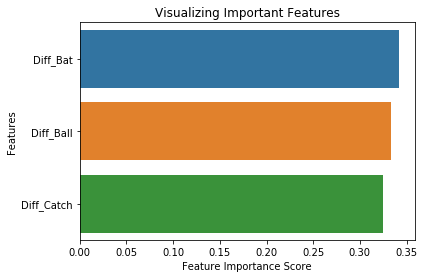

In [220]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [221]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [222]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[49 40]
 [46 55]]
             precision    recall  f1-score   support

          0       0.52      0.55      0.53        89
          1       0.58      0.54      0.56       101

avg / total       0.55      0.55      0.55       190

0.5473684210526316


In [223]:
#XGBoost

In [224]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [225]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [226]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)


In [227]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

C:\Users\akash\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [228]:

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 55.26%


In [229]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[38 51]
 [34 67]]
             precision    recall  f1-score   support

          0       0.53      0.43      0.47        89
          1       0.57      0.66      0.61       101

avg / total       0.55      0.55      0.55       190

0.5526315789473685


In [230]:
#Logistic Regression

In [231]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [232]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[30, 59],
       [22, 79]], dtype=int64)

In [233]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

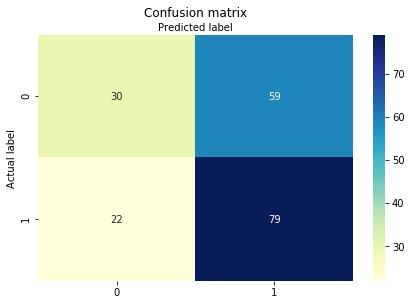

In [234]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [235]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.5736842105263158
Precision: 0.572463768115942
Recall: 0.7821782178217822


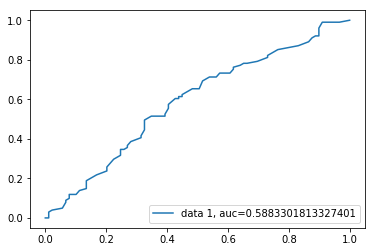

In [236]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [240]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [255]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [256]:
probs = model.predict_proba(X_test)


In [257]:
probs = probs[:, 1]

In [258]:
fpr, tpr, thresholds = roc_curve(y_test, probs)l


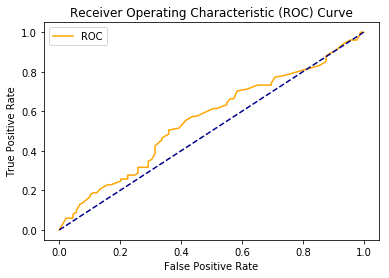

In [259]:
plot_roc_curve(fpr, tpr)

In [254]:
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.56


NameError: name 'pyplot' is not defined

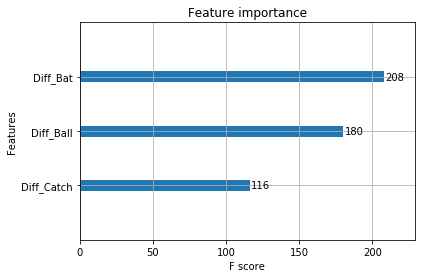

In [266]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# plot feature importance
plot_importance(model)
pyplot.show()